In [1]:
#!pip install seaborn
import seaborn as sns
import pandas as pd
from jobs_skills_weights import get_jobs, get_raw_job_details
import skill_weights
import matplotlib.pyplot as plt

In [2]:
jobs = get_jobs(bookmarked=False)
raw_job_details = get_raw_job_details(jobs)

In [4]:
job_skills_data = skill_weights.get_job_skill_counts(raw_job_details)
job_skill_weights = skill_weights.get_job_skill_weights(raw_job_details)

In [5]:
job_skills_shares = (job_skills_data / job_skills_data.sum()).rename(columns={"count":"share of total"})

In [6]:
mjss = job_skills_shares.groupby(level="skill").sum().sort_values("share of total", ascending=False)
mjss = pd.concat([mjss, pd.DataFrame({"name":[None], "share of total":[0]}).set_index("name")])

mjss["( Share WHERE Share>Threshold ) Sum"] = mjss["share of total"].shift().fillna(0).cumsum()
# mjss["Share Below Threshold"] = mjss.loc[::-1, 'share of total'].cumsum()[::-1]

mjss["( Share WHERE Share>Threshold ) Mean"] = mjss["share of total"].expanding().mean()

In [7]:
mjss

,share of total,( Share WHERE Share>Threshold ) Sum,( Share WHERE Share>Threshold ) Mean
data,0.069292,0.000000,0.069292
experience,0.061488,0.069292,0.065390
machine learning,0.057822,0.130779,0.062867
containerization,0.021757,0.188601,0.052590
research,0.020102,0.210358,0.046092
...,...,...,...
impact assessments,0.000118,0.999527,0.000792
implementing solutions,0.000118,0.999645,0.000792
improve performance,0.000118,0.999764,0.000791
zoom,0.000118,0.999882,0.000791


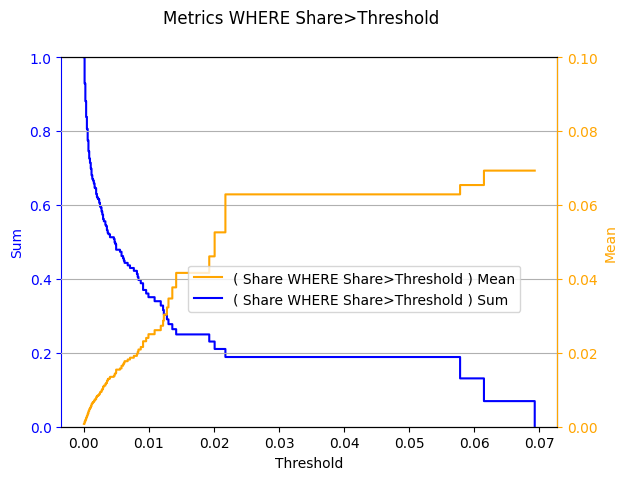

In [8]:
fig, total_axis = plt.subplots()
fig.suptitle("Metrics WHERE Share>Threshold")
density_axis = total_axis.twinx()
mjss.plot(x="share of total", y="( Share WHERE Share>Threshold ) Sum", drawstyle="steps-pre", ax=total_axis, color="blue", legend=False, ylim=(0, 1))
mjss.plot(x="share of total", y="( Share WHERE Share>Threshold ) Mean", drawstyle="steps-post", ax=density_axis, color='orange', legend=False, ylim=(0, 0.1))

t_handles, t_labels = total_axis.get_legend_handles_labels()
d_handles, d_labels = density_axis.get_legend_handles_labels()

fig.legend(handles=[*d_handles, *t_handles], labels=[*d_labels, *t_labels], loc=(0.3,0.35))

density_axis.grid()
total_axis.set_ylabel("Sum")
density_axis.set_ylabel("Mean")
total_axis.set_xlabel("Threshold")

total_axis.spines['left'].set_color("blue")
total_axis.tick_params('y', colors="blue")
total_axis.yaxis.label.set_color("blue")

density_axis.spines['left'].set_visible(False)
density_axis.spines['right'].set_color("orange")
density_axis.tick_params('y', colors="orange")
density_axis.yaxis.label.set_color("orange")

Text(0, 0.5, 'Mean')

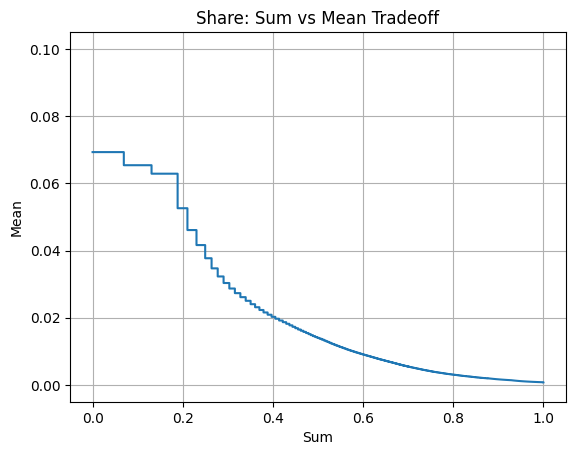

In [9]:
tradeoff_axis = mjss.plot(
    x="( Share WHERE Share>Threshold ) Sum", 
    y="( Share WHERE Share>Threshold ) Mean", 
    drawstyle='steps-post', 
    legend=False, 
    xlim=(-0.05,1.05), ylim=(-0.005, 0.105)
)

tradeoff_axis.grid()
tradeoff_axis.set_title("Share: Sum vs Mean Tradeoff")
tradeoff_axis.set_xlabel("Sum")
tradeoff_axis.set_ylabel("Mean")